In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
file = 'III_159A_catalog.dat'
names = ('Star', 'Nobs', 'Smin', 'Smax', 'Smean', 'e_Smean', 'sdS', 'Wmin', 'Wmean', 
         'Date1', 'Date2', 'SName', 'RAdeg DEdeg', 's', 'Bmag', 'Vmag', 'ASCC', 'HIP')
hk = pd.read_table(file, delimiter='|', comment='#', names=names)

In [3]:
hk.shape

(3111, 18)

(0, 250)

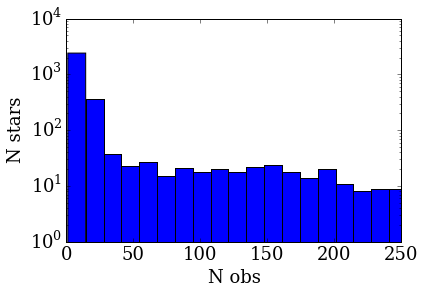

In [4]:
_ = plt.hist(hk['Nobs'],bins=100)
plt.yscale('log')
plt.xlabel('N obs')
plt.ylabel('N stars')

plt.xlim(0,250)

In [5]:
radec = hk['RAdeg DEdeg'].str.split(' ', expand=True).loc[:,0:1]
radec.columns = ['RA', 'Dec']
# radec['RA']

In [21]:
x = np.where((hk['Nobs'] > 5))[0]

In [22]:
NGalex = np.zeros(len(x)) # number galex observations
ExpGalex = np.zeros(len(x)) # total exposure time
TGalex = np.zeros(len(x)) # total time span

for i in range(len(x)):
    if len(radec['RA'].values[x[i]]) > 0:
        ra = float(radec['RA'].values[x[i]])
        dec = float(radec['Dec'].values[x[i]][1:])
        exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)

        if exp_data['NUV']['expt'] > 0:
            ExpGalex[i] = exp_data['NUV']['expt']
            NGalex[i] = exp_data['NUV']['t0'].size
            TGalex[i] = exp_data['NUV']['t0'][-1] - exp_data['NUV']['t0'][0]

No NUV exposure time in database.
NUV: 2876.0s (raw) in 5 exposures.
NUV: 2876.0s (raw) in 5 exposures.
NUV: 884.0s (raw) in 6 exposures.
NUV: 884.0s (raw) in 6 exposures.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
No NUV exposure time in database.
NUV: 4536.0s (raw) in 7 exposures.
NUV: 2537.0s (raw) in 3 exposures.
NUV: 2537.0s (raw) in 3 exposures.
No NUV exposure time in database.
NUV: 4536.0s (raw) in 7 exposures.
NUV: 4536.0s (raw) in 7 exposures.
No NUV 

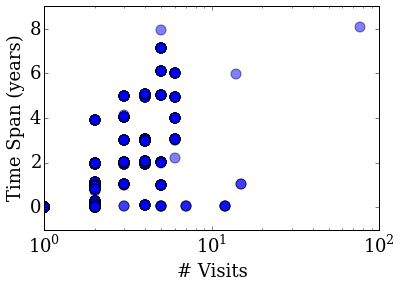

In [27]:
plt.scatter(NGalex, TGalex / (60.*60.*24.*365.), s=100, alpha=0.5)
plt.xscale('log')
plt.xlim(1,1e2)
plt.xlabel('# Visits')
plt.ylabel('Time Span (years)')

In [45]:
targets = np.where((NGalex > 5) & (TGalex / (60.*60.*24.*365.) > 3))
print(hk['Star'].values[x][targets])
print(NGalex[targets])

['Hya    17 ' 'Hya    17 ' 'HD   3229 ' 'HD   3229 ' 'HD   3229 '
 'HD   3229 ' 'HD   3229 ' 'HD   3229 ' 'HD   3229 ' 'HD   3229 '
 'HD   3229 ' 'HD   3229 ' 'HD   3229 ' 'HD   3229 ' 'HD   3229 '
 'HD   3229 ' 'HD   4174 ' 'HD  76151 ' 'HD  76151 ' 'HD  76151 '
 'HD  76151 ' 'HD  76151 ' 'HD  76151 ' 'HD  76151 ' 'HD  76151 '
 'HD  76151 ' 'HD  76151 ' 'HD  76151 ' 'HD  76151 ' 'HD  76151 '
 'HD  76151 ' 'HD  81809 ' 'HD  81809 ' 'HD  81809 ' 'HD  81809 '
 'HD  81809 ' 'HD  81809 ' 'HD  81809 ' 'HD  81809 ' 'HD  81809 '
 'HD  81809 ' 'HD  81809 ' 'HD  81809 ' 'HD  81809 ' 'HD 106516 '
 'HD 106516 ' 'HD 106516 ' 'HD 106516 ' 'HD 106516 ' 'HD 106516 '
 'HD 106516 ' 'HD 106516 ' 'HD 106516 ' 'HD 106516 ' 'HD 106516 '
 'HD 106516 ' 'HD 196574 ']
[  6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.
   6.  77.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.
   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.
   6.   6.   6.   

In [46]:
hk['Star']

0        +58 1199 
1        +51 1696 
2        +44 2051 
3        +32 0719 
4        +01 0306 
5        +01 0306 
6        +00 0873 
7       Coma   53 
8       Coma   58 
9       Coma   65 
10      Coma   76 
11      Coma   85 
12      Coma   86 
13      Coma   90 
14      Coma   92 
15      Coma   97 
16      Coma  102 
17      Coma  111 
18      Coma  114 
19      Coma  118 
20      Coma  132 
21      Coma  150 
22      Gl    685 
23      Gl    702B
24      Hya     1 
25      Hya     1 
26      Hya     2 
27      Hya     2 
28      Hya     3 
29      Hya     4 
           ...    
3081    Wly  9620 
3082    Wly  9645 
3083    Wly  9645 
3084    Wly  9660 
3085    Wly  9660 
3086    Wly  9667 
3087    Wly  9698 
3088    Wly  9698 
3089    Wly  9739 
3090    Wly  9752 
3091    Wly  9764 
3092    Wly  9764 
3093    Wly  9772 
3094    Wly  9772 
3095    Wly  9781A
3096    Wly  9782B
3097    Wly  9795 
3098    Wly  9799 
3099    Wly  9799 
3100    Wly  9840 
3101    Wly  9841 
3102    Wly 